In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


In [4]:
df.loc[:,'Date sent to company'] = pd.to_datetime(df['Date sent to company'])
datetime = pd.to_datetime(df['Date sent to company'])
df["Received Year"] = datetime.apply(lambda x: x.year)
df["Recieved Month"] = datetime.apply(lambda x: x.month)
df["Recieved Day"] = datetime.apply(lambda x: x.day)
df[["Date sent to company","Recieved Month","Received Year","Recieved Day"]].head()

,Date sent to company,Recieved Month,Received Year,Recieved Day
0,2019-09-24,9,2019,24
1,2019-09-20,9,2019,20
2,2019-10-25,10,2019,25
3,2019-11-08,11,2019,8
4,2019-02-08,2,2019,8


In [5]:
df = df.fillna('Nan')

In [6]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
Received Year                   0
Recieved Month                  0
Recieved Day                    0
dtype: int64

In [7]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Received Year', 'Recieved Month', 'Recieved Day'],
      dtype='object')

In [8]:
df = df.drop(['Date received','Consumer complaint narrative','Company','ZIP code','Complaint ID'], axis=1)

In [9]:
df.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company public response', 'State', 'Tags',
       'Consumer consent provided?', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Received Year', 'Recieved Month',
       'Recieved Day'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df.apply(LabelEncoder().fit_transform)

In [11]:
#df.head()

,Product,Sub-product,Issue,Sub-issue,Company public response,State,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Received Year,Recieved Month,Recieved Day
0,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,Nan,FL,Nan,Consent provided,Web,2019-09-24,Closed with explanation,Yes,Nan,2019,9,24
1,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Company has responded to the consumer and the ...,PA,Nan,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,Nan,2019,9,20
2,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Company has responded to the consumer and the ...,CA,Nan,Consent provided,Web,2019-10-25,Closed with explanation,Yes,Nan,2019,10,25
3,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,Nan,NC,Nan,Consent provided,Web,2019-11-08,Closed with explanation,Yes,Nan,2019,11,8
4,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Nan,FL,Nan,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,Nan,2019,2,8


In [12]:
df2.columns
df2.head()

,Product,Sub-product,Issue,Sub-issue,Company public response,State,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Received Year,Recieved Month,Recieved Day
0,7,33,14,56,11,13,0,1,5,2802,1,1,0,8,8,23
1,6,15,76,93,10,47,0,0,5,2798,3,1,0,8,8,19
2,6,15,76,93,10,8,0,1,5,2833,1,1,0,8,9,24
3,7,33,36,81,11,35,0,1,5,2847,1,1,0,8,10,7
4,16,37,116,191,11,13,0,0,5,2574,3,1,0,8,1,7


In [12]:
df2.to_csv('clean_compliants.csv', index=False)

In [13]:
import seaborn as sns

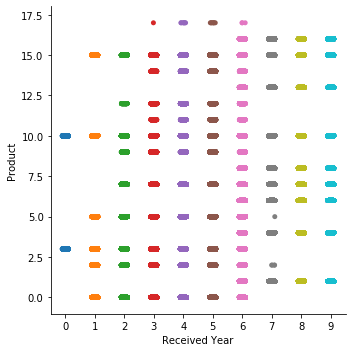

In [14]:
#sns.catplot(x='Received Year', y='Product', data =df2)

In [15]:
#corr = df2.corr()

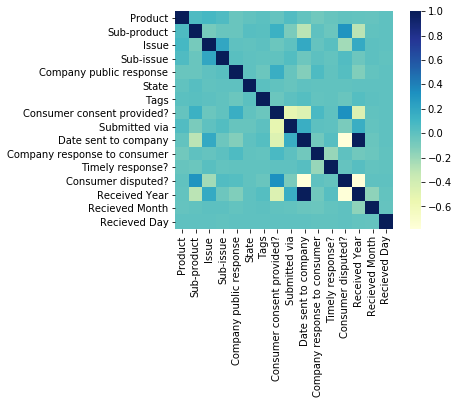

In [16]:
#sns.heatmap(corr,  cmap="YlGnBu", square=True);

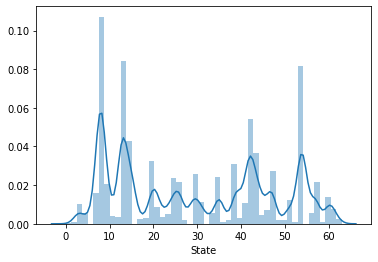

In [17]:
#sns.distplot(df2['State'])

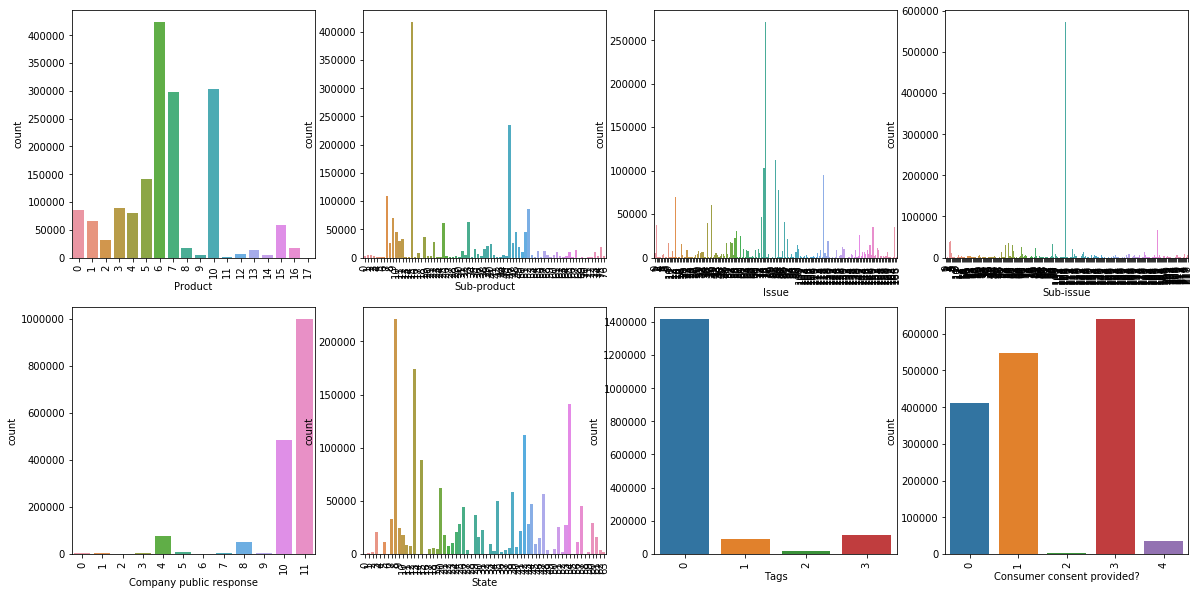

In [18]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(df2, ax.flatten()):
    sns.countplot(df2[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [14]:
df2.dtypes

Product                         int32
Sub-product                     int32
Issue                           int32
Sub-issue                       int32
Company public response         int32
State                           int32
Tags                            int32
Consumer consent provided?      int32
Submitted via                   int32
Date sent to company            int64
Company response to consumer    int32
Timely response?                int32
Consumer disputed?              int32
Received Year                   int64
Recieved Month                  int64
Recieved Day                    int64
dtype: object

In [15]:
X = df2[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company public response', 'State', 'Tags','Consumer consent provided?', 
         'Submitted via', 'Date sent to company', 'Timely response?','Consumer disputed?', 'Received Year', 
         'Recieved Month', 'Recieved Day']].values
y = df2[['Company response to consumer']]

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.13456777,  0.19873215, -1.63390286, -0.82787258,  0.47087515,
        -0.92886936, -0.35565079, -0.46508424,  0.47736688,  1.1276861 ,
         0.15203391, -0.85518474,  1.00248323,  0.81145807,  0.95549132],
       [-0.15972381, -0.77754612, -0.06498391, -0.08688914, -0.09675255,
         0.98336457, -0.35565079, -1.24179295,  0.47736688,  1.12282436,
         0.15203391, -0.85518474,  1.00248323,  0.81145807,  0.49783398],
       [-0.15972381, -0.77754612, -0.06498391, -0.08688914, -0.09675255,
        -1.21008024, -0.35565079, -0.46508424,  0.47736688,  1.1653646 ,
         0.15203391, -0.85518474,  1.00248323,  1.10664967,  1.06990566],
       [ 0.13456777,  0.19873215, -1.07718969, -0.32720809,  0.47087515,
         0.30845847, -0.35565079, -0.46508424,  0.47736688,  1.1823807 ,
         0.15203391, -0.85518474,  1.00248323,  1.40184127, -0.87513804],
       [ 2.78319199,  0.41568288,  0.94722187,  1.87571565,  0.47087515,
        -0.92886936, -0.35565079, -1.24179295, 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1311820, 15) (1311820, 1)
Test set: (327956, 15) (327956, 1)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
conTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
conTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
conTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
predTree = conTree.predict(X_test)

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7958018758613961
